# <b>PCA on Digits Dataset</b>

In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
#load the dataset
digits = load_digits()

In [8]:
#show size of the dataset
print(digits["data"].shape)

(1797, 64)


In [9]:
#define feature and target variables
X_digits = digits["data"]
y_digits = digits["target"]

In [12]:
#apply PCA to dataset. With n_components argument we can select the new feature count.
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

In [14]:
#show size of the PCA applied dataset
print(X_pca.shape)

(1797, 2)


From 64 features to 2 features.

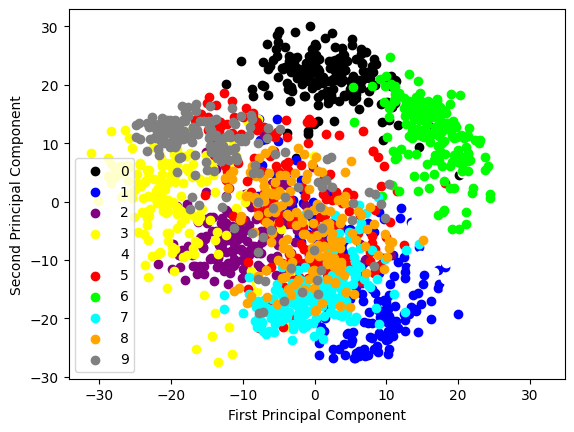

In [18]:
#visualize the dataset
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    px = X_pca[:, 0][y_digits == i]
    py = X_pca[:, 1][y_digits == i]
    plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

In [19]:
#explained variance shows how much information can be attributed to the principle components
print("Explained variance: %s" % estimator.explained_variance_ratio_)

Explained variance: [0.14890594 0.13618771]


2 features covers 27% of the dataset which is very low. This value should be minimum of 95%.

# <b>PCA on MNIST Dataset</b>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
#load the dataset
mnist_data = fetch_openml('mnist_784')

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [35]:
#define feature and target variables
features = mnist_data.data
targets = mnist_data.target

In [36]:
#show feature count of dataset
features.shape

(70000, 784)

There are 784 features.

In [37]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.15, random_state=0)


In [38]:
#standardize the dataset
scaler = StandardScaler()
scaler.fit(X_train)
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

In [39]:
#with PCA we will keep 95% variance. That means 95% coverage of original dataset with x number of features
pca = PCA(0.95)
pca.fit(train_img)

PCA(n_components=0.95)

In [40]:
#transform the dataset
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [41]:
#show feature count for PCA applied dataset
train_img.shape

(59500, 327)

Now there are 327 features. New features covered 95% of 784 features.